In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_types_distributions(data, form='bar', name_col='type'):

    if form not in ['bar', 'pie']:
        print('Invalid form, please choose between bar and pie')
        return
    
    count = data[name_col].value_counts()

    plt.figure(figsize=(10, 6))
    plt.title('Distribution of Types')
    plt.ylabel('Types')
    plt.xlabel('Count')

    if form == 'bar':
        count.plot(kind='bar')
        for i, v in enumerate(count):
            plt.text(i, v, str(v), ha='center', rotation=45, fontsize=10)
    else:
        count.plot(kind='pie', autopct='%1.1f%%', shadow=True)

    plt.show()

def count_obj_by_type(df, name_col='type'):
    obj_id_count_per_type = df.groupby(name_col)['obj_id'].nunique()
    print(obj_id_count_per_type)

In [5]:
df = pd.read_csv('/kaggle/input/bts-bot/BTS.csv')
df.rename(columns={'ZTFID': 'obj_id'}, inplace=True)

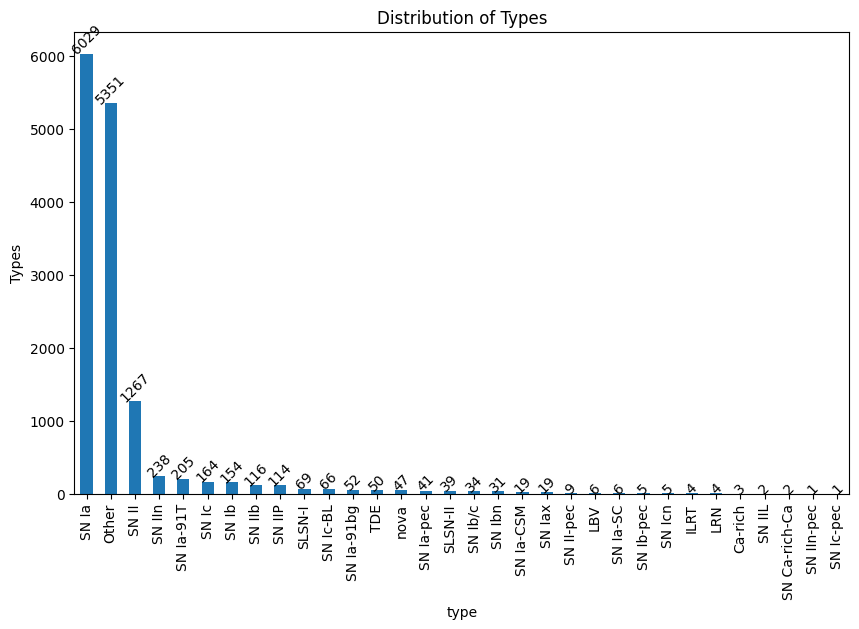

In [6]:
df_types = df[['obj_id', 'type']].drop_duplicates()
df_types['type'] = df_types['type'].apply(lambda x: 'Other' if x in ['-', 'other', 'Other'] else x)
plot_types_distributions(df_types, form='bar', name_col='type')

# Step 1 : SN vs Other

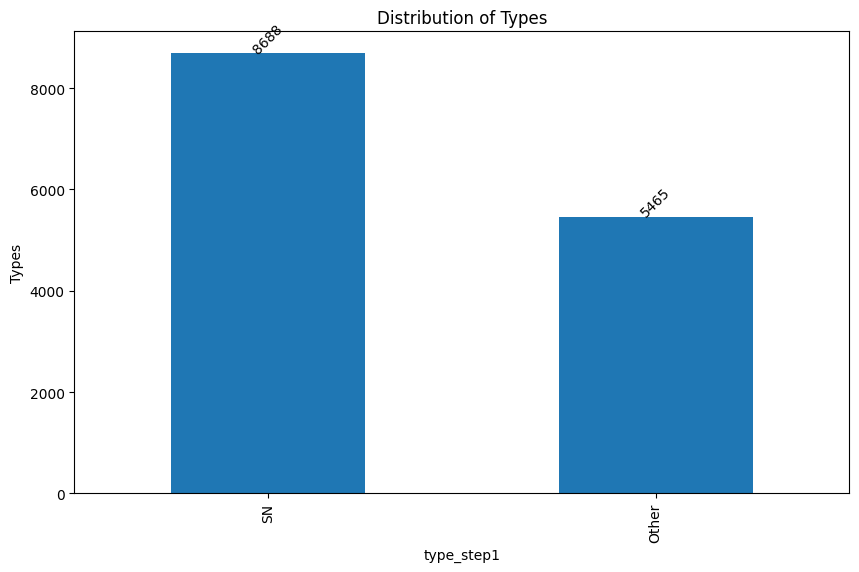

In [7]:
def categorize_type_step1(event_type):
    if 'SN' in event_type:
        return 'SN'
    else:
        return 'Other'

df_types['type_step1'] = df_types['type'].apply(categorize_type_step1)
plot_types_distributions(df_types, name_col='type_step1')

# Step 2 (SN) : SN I vs SN II

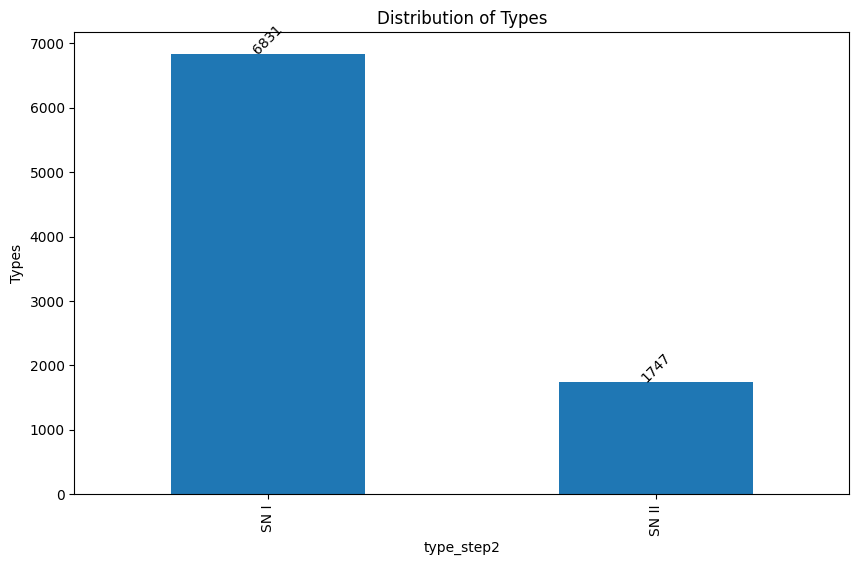

In [8]:
def categorize_type_step2(event_type):
    if 'SN II' in event_type:
        return 'SN II'
    elif 'SN I' in event_type:
        return 'SN I'
    else:
        return 'Other'

df_types['type_step2'] = df_types['type'].apply(categorize_type_step2)
df_types_step2 = df_types[df_types['type_step2'] != 'Other']
plot_types_distributions(df_types_step2, name_col='type_step2')

# Step 3a (SN I) : SN Ia vs SN Ib/c

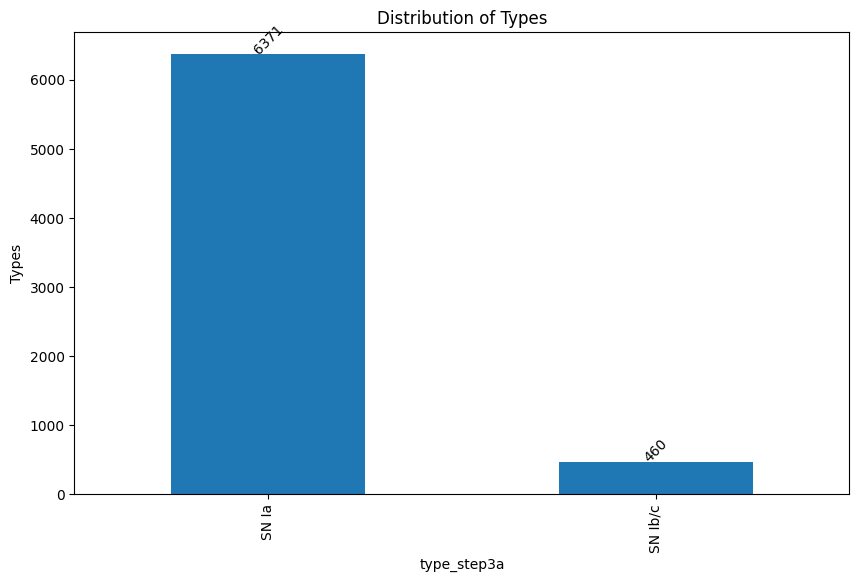

In [9]:
def categorize_type_step3a(event_type):
    if 'SN Ia' in event_type:
        return 'SN Ia'
    elif 'SN Ib' in event_type:
        return 'SN Ib/c'
    elif 'SN Ic' in event_type:
        return'SN Ib/c'
    else:
        return 'Other'

df_types['type_step3a'] = df_types['type'].apply(categorize_type_step3a)
df_types_step3a = df_types[df_types['type_step3a'] != 'Other']
plot_types_distributions(df_types_step3a, name_col='type_step3a')

# Step 3b (SN II) : SN II vs SN IIn/b

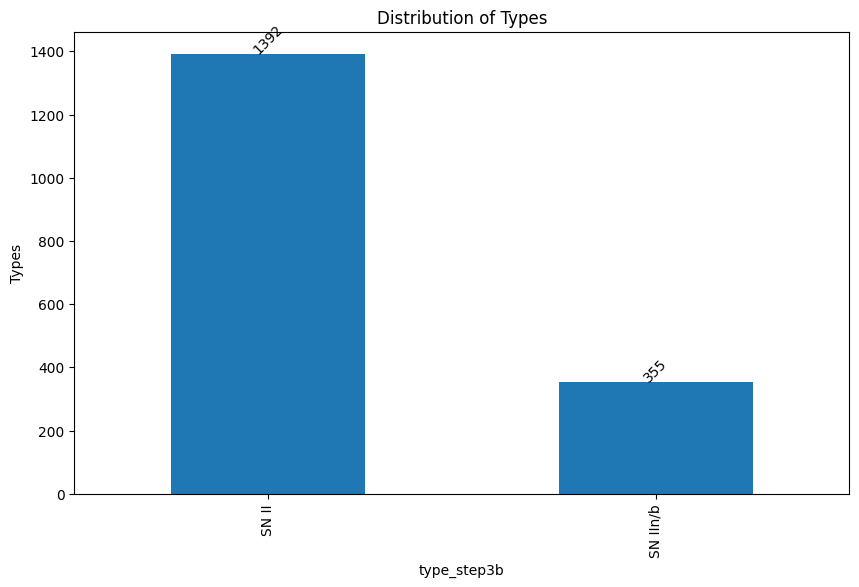

In [10]:
def categorize_type_step3b(event_type):
    if 'SN IIn' in event_type:
        return 'SN IIn/b'
    elif 'SN IIb' in event_type:
        return 'SN IIn/b'
    elif 'SN II' in event_type:
        return'SN II'
    else:
        return 'Other'

df_types['type_step3b'] = df_types['type'].apply(categorize_type_step3b)
df_types_step3b = df_types[df_types['type_step3b'] != 'Other']
plot_types_distributions(df_types_step3b, name_col='type_step3b')

In [11]:
df_types.head(20)

,obj_id,type,type_step1,type_step2,type_step3a,type_step3b
0,ZTF17aaaeqms,Other,Other,Other,Other,Other
1,ZTF17aaajowi,Other,Other,Other,Other,Other
2,ZTF17aaanztg,Other,Other,Other,Other,Other
3,ZTF17aaaocnx,Other,Other,Other,Other,Other
4,ZTF17aaaptxx,Other,Other,Other,Other,Other
5,ZTF17aaapufz,LBV,Other,Other,Other,Other
6,ZTF17aaazdba,TDE,Other,Other,Other,Other
7,ZTF17aabgaoo,Other,Other,Other,Other,Other
8,ZTF17aabhmby,Other,Other,Other,Other,Other
9,ZTF17aabtvsy,SN Ia,SN,SN I,SN Ia,Other


In [12]:
%%time
all_gp = pd.read_csv('/kaggle/input/oui-gp/oui_gp.csv')
#all_gp = all_gp.drop(columns=['Unnamed: 0'])
all_gp['prefix'] = all_gp['obj_id'].str.extract(r'([^_]+)')
all_gp = all_gp.merge(df_types, left_on='prefix', right_on='obj_id', how='left')
all_gp = all_gp.drop(columns=['obj_id_y', 'type_x'])
all_gp = all_gp.rename(columns={'obj_id_x': 'obj_id', 'type_y': 'type'})
all_gp = all_gp[['obj_id', 'type', 'mjd', 'flux_ztfg', 'flux_ztfr', 'flux_ztfi', 'flux_error_ztfg', 'flux_error_ztfr', 'flux_error_ztfi', 'type_step1', 'type_step2', 'type_step3a', 'type_step3b', 'prefix']]
all_gp

CPU times: user 34.5 s, sys: 4.79 s, total: 39.3 s
Wall time: 50.3 s


,obj_id,type,mjd,flux_ztfg,flux_ztfr,flux_ztfi,flux_error_ztfg,flux_error_ztfr,flux_error_ztfi,type_step1,type_step2,type_step3a,type_step3b,prefix
0,ZTF17aaapufz,LBV,0.000000,1.402533,1.479535,1.634879,6.342109,-0.254949,3.389898,Other,Other,Other,Other,ZTF17aaapufz
1,ZTF17aaapufz,LBV,22.545667,-0.717990,-0.948955,-0.986006,17.119245,26.416618,10.374649,Other,Other,Other,Other,ZTF17aaapufz
2,ZTF17aaapufz,LBV,45.091334,-0.793272,-1.023988,-1.077856,17.219540,26.577714,10.437917,Other,Other,Other,Other,ZTF17aaapufz
3,ZTF17aaapufz,LBV,67.637001,0.821282,0.801087,0.916357,6.723250,3.622823,3.650355,Other,Other,Other,Other,ZTF17aaapufz
4,ZTF17aaapufz,LBV,90.182667,0.374585,0.173002,0.351763,9.346990,12.314949,5.405939,Other,Other,Other,Other,ZTF17aaapufz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873495,ZTF24aahdisu_80,Other,19.892972,0.207720,0.117175,0.000000,0.938231,0.266006,0.000000,Other,Other,Other,Other,ZTF24aahdisu
6873496,ZTF24aahdisu_80,Other,20.102372,0.205694,0.114879,0.000000,0.975863,0.280351,0.000000,Other,Other,Other,Other,ZTF24aahdisu
6873497,ZTF24aahdisu_80,Other,20.311772,0.203402,0.112281,0.000000,1.013330,0.298304,0.000000,Other,Other,Other,Other,ZTF24aahdisu
6873498,ZTF24aahdisu_80,Other,20.521171,0.200850,0.109384,0.000000,1.050725,0.320659,0.000000,Other,Other,Other,Other,ZTF24aahdisu


# Select fewer obj for larger classes

### Step 1: SN vs Other

Before

In [13]:
step1_df = all_gp.drop(columns=['type', 'type_step2', 'type_step3a', 'type_step3b'])
step1_df = step1_df.rename(columns={'type_step1': 'type'})
count_obj_by_type(step1_df, name_col='type')

type
Other    15998
SN       36434
Name: obj_id, dtype: int64


After

In [14]:
step1_df = step1_df[~((step1_df['obj_id'].str.contains('_20|_50|_80')) & (step1_df['type'] == 'SN'))]
count_obj_by_type(step1_df, name_col='type')

type
Other    15998
SN        8155
Name: obj_id, dtype: int64


### Step 2 (SN): SN I vs SN II, Other

Before

In [15]:
step2_df = all_gp.drop(columns=['type', 'type_step1', 'type_step3a', 'type_step3b'])
step2_df = step2_df.rename(columns={'type_step2': 'type'})
count_obj_by_type(step2_df, name_col='type')

type
Other    16496
SN I     27838
SN II     8098
Name: obj_id, dtype: int64


After

In [16]:
step2_df = step2_df[~((step2_df['obj_id'].str.contains('_20|_50|_80')) & (step2_df['type'] == 'SN I'))]
step2_df = step2_df[~((step2_df['obj_id'].str.contains('_20|_50')) & (step2_df['type'] == 'Other'))]
count_obj_by_type(step2_df, name_col='type')

type
Other    9737
SN I     6401
SN II    8098
Name: obj_id, dtype: int64


### Step 3a (SN I): SN Ia vs SN Ib/c, Other

Before

In [17]:
step3a_df = all_gp.drop(columns=['type', 'type_step1', 'type_step2', 'type_step3b'])
step3a_df = step3a_df.rename(columns={'type_step3a': 'type'})
count_obj_by_type(step3a_df, name_col='type')

type
Other      24594
SN Ia      25844
SN Ib/c     1994
Name: obj_id, dtype: int64


After

In [18]:
step3a_df = step3a_df[~((step3a_df['obj_id'].str.contains('_20|_50|_80')) & (step3a_df['type'] == 'SN Ia'))]
step3a_df = step3a_df[~((step3a_df['obj_id'].str.contains('_20|_50|_80')) & (step3a_df['type'] == 'Other'))]
count_obj_by_type(step3a_df, name_col='type')

type
Other      5992
SN Ia      5968
SN Ib/c    1994
Name: obj_id, dtype: int64


### Step 3b (SN II): SN II vs SN IIn/b, Other

Before

In [19]:
step3b_df = all_gp.drop(columns=['type', 'type_step1', 'type_step2', 'type_step3a'])
step3b_df = step3b_df.rename(columns={'type_step3b': 'type'})
count_obj_by_type(step3b_df, name_col='type')

type
Other       44334
SN II        6383
SN IIn/b     1715
Name: obj_id, dtype: int64


After

In [20]:
step3b_df = step3b_df[~((step3b_df['obj_id'].str.contains('_20|_50')) & (step3b_df['type'] == 'SN II'))]
step3b_df = step3b_df[~((step3b_df['obj_id'].str.contains('_20|_50|_80')) & (step3b_df['type'] == 'Other'))]
count_obj_by_type(step3b_df, name_col='type')

type
Other       10746
SN II        3219
SN IIn/b     1715
Name: obj_id, dtype: int64


# Load images + metadata

In [21]:
cand = pd.read_csv('/kaggle/input/bts-bot-metadata-images/train_cand_ZTFSS.csv')
triplets = np.load('/kaggle/input/bts-bot-metadata-images/train_triplets_ZTFSS.npy', mmap_mode='r')

print('Shape of cand:', cand.shape)
print('Shape of images:', triplets.shape)

Shape of cand: (10359, 82)
Shape of images: (10359, 63, 63, 3)


In [22]:
cand = cand.merge(step1_df[['obj_id', 'type']].drop_duplicates(), left_on='objectId', right_on='obj_id', how='left')
cand.drop(columns=['obj_id'], inplace=True)

valid_indices = cand[cand['type'].isna() == False].index
cand = cand.loc[valid_indices]
count_types = cand.groupby('type')['objectId'].nunique()
print(count_types)

type
Other    1194
SN       4489
Name: objectId, dtype: int64


In [23]:
cand.sort_values(by='objectId', inplace=True)
images = np.array([triplets[idx] for idx in cand.index])
cand.reset_index(drop=True, inplace=True)

print("Shape of cand:", cand.shape)
print("Shape of images:", images.shape)

Shape of cand: (5683, 83)
Shape of images: (5683, 63, 63, 3)


In [24]:
photo_df = step1_df[step1_df['prefix'].isin(cand['objectId'].unique())]
photo_df = photo_df.sort_values(by='obj_id')
photo_df.reset_index(drop=True, inplace=True)
count_obj_by_type(photo_df)

type
Other    4581
SN       4489
Name: obj_id, dtype: int64


In [25]:
import random
from tqdm import tqdm

def augment_data(photo_df, cand, images, noise_strength=0.05):
    """
    Augment data by adding noise to metadata and applying transformations to images.

    Parameters:
        photo_df (DataFrame): DataFrame containing photo data with 'obj_id' and 'prefix'.
        cand (DataFrame): DataFrame containing candidate data with 'objectId' and numeric metadata.
        images (ndarray): Array of images associated with entries in 'cand'.
        noise_strength (float): The standard deviation multiplier for noise.

    Returns:
        Tuple containing updated DataFrame and image array.
    """
    new_ids = photo_df[photo_df['obj_id'].str.contains('_')]['obj_id'].unique()
    metadata_columns = cand.select_dtypes(include=[np.number]).columns
    print(f"Processing {len(new_ids)} augmented entries.")
    
    for new_id in tqdm(new_ids):
        original_id = photo_df.loc[photo_df['obj_id'] == new_id, 'prefix'].values[0]
        
        # Check for the corresponding original entry in 'cand'
        if original_id in cand['objectId'].values:
            original_index = cand[cand['objectId'] == original_id].index[0]
            row_to_copy = cand.loc[original_index].copy()

            # Add noise to metadata
            for col in metadata_columns:
                row_to_copy[col] += noise_strength * np.random.randn() * row_to_copy[col]

            # Modify the objectId to the new_id and add to cand
            row_to_copy['objectId'] = new_id
            cand = pd.concat([cand, pd.DataFrame([row_to_copy])], ignore_index=True)
            
            # Copy and transform the image associated with the original index in 'cand'
            image_to_copy = images[original_index]
            transform_choice = random.choice(['rotate90', 'rotate180', 'flip_horizontal'])
            if transform_choice == 'rotate90':
                image_to_copy = np.rot90(image_to_copy)
            elif transform_choice == 'rotate180':
                image_to_copy = np.rot90(image_to_copy, 2)
            elif transform_choice == 'flip_horizontal':
                image_to_copy = np.flipud(image_to_copy)

            image_to_copy = image_to_copy.reshape(1, 63, 63, 3)
            images = np.concatenate((images, image_to_copy), axis=0)
        else:
            print(f"No data found for original_id {original_id}")

    # Sort and align
    cand.sort_values(by='objectId', inplace=True)
    images_final = np.array([images[idx] for idx in cand.index])
    cand.reset_index(drop=True, inplace=True)
    
    print('Shape of Photometry:', photo_df.shape)
    print('Shape of Metadata:', cand.shape)
    print('Shape of Images:', images.shape)
    
    return cand, images_final

In [26]:
cand, images = augment_data(photo_df, cand, images)

print('Shape of Photometry:', photo_df.shape)
print('Shape of Metadata:', cand.shape)
print('Shape of Images:', images.shape)
count_obj_by_type(photo_df)

Processing 3387 augmented entries.


100%|██████████| 3387/3387 [25:12<00:00,  2.24it/s]


Shape of Photometry: (1184000, 10)
Shape of Metadata: (9070, 83)
Shape of Images: (9070, 63, 63, 3)
Shape of Photometry: (1184000, 10)
Shape of Metadata: (9070, 83)
Shape of Images: (9070, 63, 63, 3)
type
Other    4581
SN       4489
Name: obj_id, dtype: int64


In [1]:
sorted_obj_id = photo_df['obj_id'].unique()
sorted_objectId = np.array(cand['objectId'])

are_equal = np.array_equal(sorted_obj_id, sorted_objectId)
print(are_equal)

NameError: name 'photo_df' is not defined

In [21]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder

def robust_scale(dataframe, scale_columns):
    scaler = RobustScaler()
    scaler = scaler.fit(dataframe[scale_columns])
    dataframe.loc[:, scale_columns] = scaler.transform(
        dataframe[scale_columns].to_numpy()
    )
    return dataframe

def Normalize_mjd(df):
    df_copy = df.dropna().copy()

    df_copy['mjd'] = df_copy.groupby('obj_id')['mjd'].transform(lambda x: x - np.min(x))

    df_copy.reset_index(drop=True, inplace=True)
    return df_copy

In [ ]:
cand

In [ ]:
scale_columns_photo = ['flux_ztfg', 'flux_ztfr', 'flux_ztfi', 'flux_error_ztfg', 'flux_error_ztfr', 'flux_error_ztfi']
photo_df = robust_scale(photo_df, scale_columns_photo)

scale_columns_metadata = [
    "sgscore1", "sgscore2", 
    "distpsnr1", "distpsnr2", 
    "fwhm", 
    "magpsf", 
    "sigmapsf", 
    "ra", 
    "dec", 
    "diffmaglim", 
    "ndethist", 
    "nmtchps", 
    "drb", 
    "ncovhist", 
    "sharpnr", 
    "scorr", 
    "sky"
]

cand = robust_scale(cand, scale_columns_metadata)

# Encodage des colonnes catégorielles
categorical_cols = ['type']
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(cand[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
cand = cand.drop(columns=categorical_cols).join(encoded_df)

# Afficher les premières lignes du DataFrame transformé
print(cand.head())

In [22]:
def plot_random_triplets(triplets, info_df, num_plots):
    indices = np.random.choice(triplets.shape[0], size=num_plots, replace=False)
    
    indices = ['ZTF18aajivpr', 'ZTF18aajivpr_80', 'ZTF18aajivpr_end_80']
    
    print()

    filtered_indices = info_df[info_df['objectId'].isin(indices)].index
    titles = ['Science', 'Template', 'Difference']
    
    for index in filtered_indices.tolist():
        triplet = triplets[index]
        obj_id = info_df.loc[index, 'objectId']
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        fig.suptitle(f'Triplet Index: {index} - {obj_id}', fontsize=16)
        
        for i, ax in enumerate(axes):
            ax.imshow(triplet[:, :, i], cmap='gray')
            ax.set_title(titles[i])
            ax.axis('off')
        
        plt.show()

plot_random_triplets(images, cand, 5)

NameError: name 'images' is not defined

In [33]:
!pip install tensorflow_model_optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 4.5 MB/s eta 0:00:00a 0:00:01


In [49]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_model_optimization as tfmot
import numpy as np
from tensorflow.keras.utils import register_keras_serializable

class PrunableClusterableLayer(
    tf.keras.layers.Layer,
    tfmot.sparsity.keras.PrunableLayer,
    tfmot.clustering.keras.ClusterableLayer,
):
    def get_prunable_weights(self):
        # Prune kernel only, as pruning bias can harm model accuracy.
        return [self.conv1d.kernel]

    def get_clusterable_weights(self):
        # Cluster only the kernel as clustering bias usually harms model accuracy.
        return [("kernel", self.conv1d.kernel)]

    def get_clusterable_algorithm(self, weight_name):
        # Example algorithm, customize as necessary
        if weight_name == "kernel":
            return tfmot.clustering.keras.cluster_config.CentroidInitialization.LINEAR
        else:
            return None
        
class ConvEmbedding(PrunableClusterableLayer):
    def __init__(self, num_filters, kernel_size=1, activation='relu', **kwargs):
        super(ConvEmbedding, self).__init__(**kwargs)
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.activation = activation
        self.conv1d = layers.Conv1D(
            filters=self.num_filters, kernel_size=self.kernel_size, activation=self.activation, padding='same'
        )

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_filters": self.num_filters,
            "kernel_size": self.kernel_size,
            "activation": self.activation,
        })
        return config

    def call(self, inputs):
        return self.conv1d(inputs)
    
class PositionalEncoding(PrunableClusterableLayer):
    def __init__(self, max_steps, max_dims, dtype=tf.float32, **kwargs):
        super(PositionalEncoding, self).__init__(dtype=dtype, **kwargs)
        self.max_steps = max_steps
        self.max_dims = max_dims

        if max_dims % 2 == 1:
            max_dims += 1
        p, i = np.meshgrid(np.arange(max_steps), np.arange(max_dims // 2))
        pos_emb = np.empty((1, max_steps, max_dims))
        pos_emb[0, :, ::2] = np.sin(p / 10000 ** (2 * i / max_dims)).T
        pos_emb[0, :, 1::2] = np.cos(p / 10000 ** (2 * i / max_dims)).T
        self.positional_embedding = tf.constant(pos_emb.astype(np.float32))

    def get_config(self):
        config = super().get_config()
        config.update({
            "max_steps": self.max_steps,
            "max_dims": self.max_dims,
        })
        return config

    def call(self, inputs):
        shape = tf.shape(inputs)
        return inputs + self.positional_embedding[:, :shape[1], :shape[2]]
    
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}")
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
    
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)

        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output
    
class TransformerBlock(PrunableClusterableLayer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim

        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"), 
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "ff_dim": self.ff_dim,
        })
        return config

    def call(self, inputs, training=False):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class ImageProcessor(tf.keras.layers.Layer):
    def __init__(self):
        super(ImageProcessor, self).__init__()
        self.conv1 = layers.Conv2D(32, (5, 5), activation='relu', padding="same")
        self.conv2 = layers.Conv2D(32, (5, 5), activation='relu', padding="same")
        self.pool1 = layers.MaxPooling2D(pool_size=(2, 2))
        self.drop1 = layers.Dropout(0.50)
        self.conv3 = layers.Conv2D(64, (5, 5), activation='relu', padding="same")
        self.conv4 = layers.Conv2D(64, (5, 5), activation='relu', padding="same")
        self.pool2 = layers.MaxPooling2D(pool_size=(4, 4))
        self.drop2 = layers.Dropout(0.55)
        self.flatten = layers.Flatten()

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.drop1(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool2(x)
        x = self.drop2(x)
        return self.flatten(x)

class MetadataProcessor(tf.keras.layers.Layer):
    def __init__(self):
        super(MetadataProcessor, self).__init__()
        self.batch_norm = layers.BatchNormalization()
        self.dense1 = layers.Dense(128, activation='relu')
        self.drop1 = layers.Dropout(0.25)
        self.dense2 = layers.Dense(128, activation='relu')

    def call(self, inputs):
        y = self.batch_norm(inputs)
        y = self.dense1(y)
        y = self.drop1(y)
        return self.dense2(y)

class MultimodalModel(tf.keras.Model):
    def __init__(self):
        super(MultimodalModel, self).__init__()
        self.image_processor = ImageProcessor()
        self.metadata_processor = MetadataProcessor()
        self.concat = layers.Concatenate()
        self.final_dense1 = layers.Dense(8, activation='relu')
        self.dropout = layers.Dropout(0.20)
        self.final_dense2 = layers.Dense(1)

    def call(self, inputs):
        images, metadata = inputs
        processed_images = self.image_processor(images)
        processed_metadata = self.metadata_processor(metadata)
        combined = self.concat([processed_images, processed_metadata])
        x = self.final_dense1(combined)
        x = self.dropout(x)
        return self.final_dense2(x)
    
@register_keras_serializable()
class T2Model(tf.keras.Model):
    def __init__(self, num_filters, num_classes, num_layers, d_model, num_heads, dff, input_shapes, rate=0.1):
        super(T2Model, self).__init__()
        self.num_filters = num_filters
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.d_model = d_model
        self.num_heads = num_heads
        self.dff = dff
        self.rate = rate

        self.multimodal_model = MultimodalModel()

        # Transformer components for photometry
        self.embedding = ConvEmbedding(num_filters=self.num_filters, kernel_size=3, activation='relu')
        self.pos_encoding = PositionalEncoding(max_steps=input_shapes[0][0], max_dims=d_model)
        self.encoder_layers = [TransformerBlock(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = layers.Dropout(rate)
        self.concat = layers.Concatenate(axis=-1)
        self.final_layer = layers.Dense(num_classes, activation='sigmoid')

    def call(self, inputs, training=False):
        photometry, metadata, image = inputs

        x = self.embedding(photometry)
        x = self.pos_encoding(x)

        for layer in self.encoder_layers:
            x = layer(x, training=training)

        x = layers.GlobalAveragePooling1D()(x)

        multimodal_output = self.multimodal_model([image, metadata])
        x = self.concat([x, multimodal_output])
        x = self.dropout(x, training=training)
        return self.final_layer(x)

    def build(self, input_shapes):
        photometry = tf.keras.Input(shape=input_shapes[0], name="photometry_input")
        metadata = tf.keras.Input(shape=input_shapes[1], name="metadata_input")
        images = tf.keras.Input(shape=input_shapes[2], name="image_input")
        _ = self.call([photometry, metadata, images])

In [ ]:
columns = [
  "objectId",
  "sgscore1", "sgscore2", 
  "distpsnr1", "distpsnr2", 
  "fwhm", 
  "magpsf", 
  "sigmapsf", 
  "ra", 
  "dec", 
  "diffmaglim", 
  "ndethist", 
  "nmtchps", 
  "drb", 
  "ncovhist", 
  "sharpnr", 
  "scorr", 
  "sky",
  "type_Other",
  "type_SN"
]

cand = cand[columns]

In [ ]:
df_cleaned = photo_df.drop_duplicates()
df_cleaned

In [ ]:
df_top100 = photo_df.groupby('obj_id').head(100)
df_top100

In [ ]:
sorted_obj_id = df_top100['obj_id'].unique()
sorted_objectId = np.array(cand['objectId'])

are_equal = np.array_equal(sorted_obj_id, sorted_objectId)
print(are_equal)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Photométrie
# Aggregating photometry data into sequences

grouped = df_top100.groupby('obj_id')
sequences = [group[['mjd', 'flux_ztfg', 'flux_ztfi', 'flux_ztfr']].values for _, group in grouped]
X_photometry = np.array(sequences)

# Métadonnées
metadata_features = cand.drop(columns=['objectId', 'type_Other', 'type_SN'])
X_metadata = metadata_features.values

# Labels (One-Hot Encoded Types)
labels = cand[['type_Other', 'type_SN']].values

indices = range(len(X_metadata))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

# Appliquez ces indices pour diviser toutes les données
X_train_photometry = X_photometry[train_idx]
X_test_photometry = X_photometry[test_idx]

X_train_metadata = X_metadata[train_idx]
X_test_metadata = X_metadata[test_idx]

X_train_images = images[train_idx]
X_test_images = images[test_idx]

y_train = labels[train_idx]
y_test = labels[test_idx]

X_train = [X_train_photometry, X_train_metadata, X_train_images]
X_test = [X_test_photometry, X_test_metadata, X_test_images]

# print shape
print("Train Photometry Shape:", X_train[0].shape)
print("Test Photometry Shape:", X_test[0].shape)

print("Train Metadata Shape:", X_train[1].shape)
print("Test Metadata Shape:", X_test[1].shape)

print("Train Images Shape:", X_train[2].shape)
print("Test Images Shape:", X_test[2].shape)

In [30]:
import seaborn as sns

def plot_distribution(y_train, labels=['Other', 'SN']):
    y_train_integers = np.argmax(y_train, axis=1)
    class_counts = np.bincount(y_train_integers)

    df_counts = pd.DataFrame({
        'Class Label': labels,
        'Count': class_counts
    })

    plt.figure(figsize=(8, 4))
    barplot = sns.barplot(x='Class Label', y='Count', data=df_counts)
    plt.title('Distribution of Classes in Training Data')

    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', 
                         xytext=(0, 5),
                         textcoords='offset points')

    plt.show()

In [ ]:
plot_distribution(y_train)

In [ ]:
X_train_shapes = [X_train[0].shape[1:], X_train[1].shape[1:], X_train[2].shape[1:]]
X_train_shapes

In [ ]:
from tensorflow.keras.optimizers import Adam

config = {
    'image_size': (63,63,3),
    'metadata_size': (17,),
    'dropout_1': 0.3,
    'dropout_2': 0.3,
    'dropout_3': 0.3,
}

num_filters = 64
num_classes = y_train.shape[1]
num_layers = 1
d_model = 64
num_heads = 16
dff = 128
rate = 0.5

X_train_shapes = [X_train[0].shape[1:], X_train[1].shape[1:], X_train[2].shape[1:]]

# Initialize the T2Model with the proper configuration
model = T2Model(num_filters=num_filters, num_classes=num_classes, num_layers=num_layers,
                d_model=d_model, num_heads=num_heads, dff=dff, input_shapes=X_train_shapes, 
                rate=rate)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Creating the final model instance
model.build(input_shapes=X_train_shapes)

# Print the model summary
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_path = 'step_1.weights.h5'
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# Callback to stop training when a monitored metric has stopped improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=50,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Callback to reduce the learning rate when a metric has stopped improving
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.01,  # Factor by which the learning rate will be reduced
    patience=40,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1
)

callbacks = [early_stopping_callback, reduce_lr_callback, checkpoint_callback]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_train_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_integers), y=y_train_integers)
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}

class_weight_dict

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weight_dict
)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import keras

model.load_weights('/kaggle/working/step_1.weights.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(
    X_test,
    y_test,
    verbose=1
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

label_names = ['Other', 'SN']

print(classification_report(y_true, y_pred_classes, target_names=label_names))

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores, pos_label):
    """
    Plot the ROC curve for binary classification results.
    
    Parameters:
    - y_true (array): Array of true binary labels (0 or 1).
    - y_scores (array): Array of scores or probabilities for the positive class.
    - pos_label (int): The label considered as positive in the binary classification.
    
    Outputs:
    - A plot of the ROC curve.
    """
    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=pos_label)
    
    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [ ]:
plot_roc_curve(y_test[:, 1], model.predict(X_test)[:, 1], pos_label=1)

In [45]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

def plot_confusion_matrix(y_true, y_pred_classes, label_names):
    """
    Plot a normalized confusion matrix (by true label counts) for the classification results.
    
    Parameters:
    - y_true (array): True class labels.
    - y_pred_classes (array): Predicted class indices.
    - label_names (list of str): Names corresponding to the class indices.
    
    Outputs:
    - A heatmap of the normalized confusion matrix annotated with percentage of instances in each category.
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    
    # Normalize the confusion matrix by the number of instances in each actual class (row normalization)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create a DataFrame from the normalized confusion matrix for better label handling in the heatmap
    cm_df = pd.DataFrame(cm_normalized, index=label_names, columns=label_names)
    
    # Plotting the confusion matrix using seaborn
    plt.figure(figsize=(10, 7))
    heatmap = sns.heatmap(cm_df, annot=True, fmt=".2%", cmap="Blues")
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [ ]:
plot_confusion_matrix(y_true, y_pred_classes, label_names)

In [ ]:
predicted_class = np.argmax(y_pred, axis=1)
max_prob = np.max(y_pred, axis=1)

# Trouver où les prédictions sont correctes
correct_predictions = predicted_class == y_true

# Compter combien de prédictions correctes ont une confiance de plus de 90%
high_confidence_correct = np.sum((max_prob > 0.9) & correct_predictions)

print(f"Nombre de prédictions correctes avec plus de 90% de confiance : {high_confidence_correct}/{len(y_pred)}")
print(f"Pourcentage : {(high_confidence_correct / len(y_pred)) * 100:.2f}%")

# Calcul de l'écart entre les probabilités des deux classes
prob_diff = np.abs(y_pred[:, 0] - y_pred[:, 1])

# Compter combien de fois l'écart est inférieur à 0.3
close_calls = np.sum(prob_diff < 0.3)

print(f"Nombre de prédictions avec moins de 0.3 d'écart : {close_calls}")

# Identifier les prédictions incorrectes
incorrect_predictions = predicted_class != y_true

# Compter les prédictions incorrectes avec plus de 80% de confiance
high_confidence_incorrect = np.sum((max_prob > 0.9) & incorrect_predictions)

print(f"Nombre de prédictions incorrectes avec plus de 90% de confiance : {high_confidence_incorrect}")

In [25]:
cand = pd.read_csv('/kaggle/input/bts-bot-metadata-images/train_cand_ZTFSS.csv')
triplets = np.load('/kaggle/input/bts-bot-metadata-images/train_triplets_ZTFSS.npy', mmap_mode='r')

print('Shape of cand:', cand.shape)
print('Shape of images:', triplets.shape)

step2_df = step2_df[step2_df['type'] != 'Other']

cand = cand.merge(step2_df[['obj_id', 'type']].drop_duplicates(), left_on='objectId', right_on='obj_id', how='left')
cand.drop(columns=['obj_id'], inplace=True)

valid_indices = cand[cand['type'].isna() == False].index
cand = cand.loc[valid_indices]
count_types = cand.groupby('type')['objectId'].nunique()
print(count_types)

cand.sort_values(by='objectId', inplace=True)
images = np.array([triplets[idx] for idx in cand.index])
cand.reset_index(drop=True, inplace=True)

print("Shape of cand:", cand.shape)
print("Shape of images:", images.shape)

photo_df = step2_df[step2_df['prefix'].isin(cand['objectId'].unique())]
photo_df = photo_df.sort_values(by='obj_id')
photo_df.reset_index(drop=True, inplace=True)
count_obj_by_type(photo_df)

cand, images = augment_data(photo_df, cand, images)

print('Shape of Photometry:', photo_df.shape)
print('Shape of Metadata:', cand.shape)
print('Shape of Images:', images.shape)
count_obj_by_type(photo_df)

sorted_obj_id = photo_df['obj_id'].unique()
sorted_objectId = np.array(cand['objectId'])

are_equal = np.array_equal(sorted_obj_id, sorted_objectId)
print(are_equal)

scale_columns_photo = ['flux_ztfg', 'flux_ztfr', 'flux_ztfi', 'flux_error_ztfg', 'flux_error_ztfr', 'flux_error_ztfi']
photo_df = robust_scale(photo_df, scale_columns_photo)

scale_columns_metadata = [
    "sgscore1",
    "distpsnr1",
    "sgscore2",
    "distpsnr2",
    "fwhm",
    "magpsf",
    "sigmapsf",
    "ra",
    "dec",
    "diffmaglim",
    "ndethist",
    "nmtchps",
    "age",
    "peakmag_so_far"
    ]
cand = robust_scale(cand, scale_columns_metadata)
categorical_cols = ['type']

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(cand[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
cand = cand.drop(columns=categorical_cols).join(encoded_df)
cand.head()

Shape of cand: (10359, 82)
Shape of images: (10359, 63, 63, 3)
type
SN I     3659
SN II     785
Name: objectId, dtype: int64
Shape of cand: (4444, 83)
Shape of images: (4444, 63, 63, 3)
type
SN I     3659
SN II    3776
Name: obj_id, dtype: int64
Processing 2991 augmented entries.


100%|██████████| 2991/2991 [20:00<00:00,  2.49it/s]


Shape of Photometry: (996500, 10)
Shape of Metadata: (7435, 83)
Shape of Images: (7435, 63, 63, 3)
Shape of Photometry: (996500, 10)
Shape of Metadata: (7435, 83)
Shape of Images: (7435, 63, 63, 3)
type
SN I     3659
SN II    3776
Name: obj_id, dtype: int64
True


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,objectId,jd,label,fid,diffmaglim,candid,isdiffpos,field,ra,dec,...,sigmagnr,source_set,N,split,is_SN,near_threshold,is_rise,programid,type_SN I,type_SN II
0,ZTF17aacldgo,2.459896e+06,0.000000,2.000000,-0.397292,2.141299e+18,True,403.000000,-1.011809,-0.647003,...,0.046000,dims,1.000000,train,True,False,True,1.000000,1.0,0.0
1,ZTF18aaaibml,2.458884e+06,1.000000,1.000000,-0.710167,1.129398e+18,True,520.000000,-0.264170,-0.292635,...,0.052000,trues,1.000000,train,True,False,True,1.000000,0.0,1.0
2,ZTF18aaaibml_20,2.483270e+06,0.992772,1.012948,-0.625877,9.708760e+17,True,484.472723,-0.314264,-0.292474,...,0.054075,trues,1.066292,train,True,False,True,1.023980,0.0,1.0
3,ZTF18aaaibml_50,2.434893e+06,1.000201,1.034867,-0.083609,1.069125e+18,True,569.113245,-0.255279,-0.300423,...,0.054252,trues,0.947178,train,True,False,True,1.034111,0.0,1.0
4,ZTF18aaaibml_80,2.474309e+06,1.019116,1.093398,-1.570142,1.181547e+18,True,465.260529,-0.238953,-0.295956,...,0.047917,trues,0.965744,train,True,False,True,0.991846,0.0,1.0


In [26]:
config = {
    'image_size': (63,63,3),
    'metadata_size': (14,),
    'dropout_1': 0.4,
    'dropout_2': 0.4,
    'dropout_3': 0.5,
}

metadata_cols = [
  "objectId",
  "sgscore1",
  "distpsnr1",
  "sgscore2",
  "distpsnr2",
  "fwhm",
  "magpsf",
  "sigmapsf",
  "ra",
  "dec",
  "diffmaglim",
  "ndethist",
  "nmtchps",
  "age",
  "peakmag_so_far",
  "type_SN I",
  "type_SN II"
]

cand = cand[metadata_cols]

Train Photometry Shape: (5948, 100, 4)
Test Photometry Shape: (1487, 100, 4)
Train Metadata Shape: (5948, 14)
Test Metadata Shape: (1487, 14)
Train Images Shape: (5948, 63, 63, 3)
Test Images Shape: (1487, 63, 63, 3)


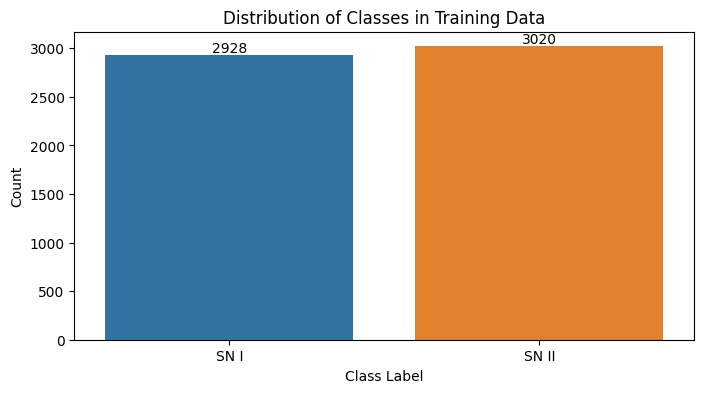

Model: "t2_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ multimodal_model                │ (None, 1)              │       226,409 │
│ (MultimodalModel)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_embedding (ConvEmbedding)  │ (None, 100, 64)        │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_encoding             │ (None, 100, 64)        │             0 │
│ (PositionalEncoding)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 100, 64)        │        33,472 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_1 (Concatenate)     │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,845 (1018.93 KB)

 Trainable params: 260,817 (1018.82 KB)

 Non-trainable params: 28 (112.00 B)

In [35]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Photométrie
# Aggregating photometry data into sequences

photo_df = photo_df.groupby('obj_id').head(100)

grouped = photo_df.groupby('obj_id')
sequences = [group[['mjd', 'flux_ztfg', 'flux_ztfi', 'flux_ztfr']].values for _, group in grouped]
X_photometry = np.array(sequences)

# Métadonnées
metadata_features = cand.drop(columns=['objectId', 'type_SN I', 'type_SN II'])
X_metadata = metadata_features.values

# Labels (One-Hot Encoded Types)
labels = cand[['type_SN I', 'type_SN II']].values

indices = range(len(X_metadata))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

# Appliquez ces indices pour diviser toutes les données
X_train_photometry = X_photometry[train_idx]
X_test_photometry = X_photometry[test_idx]

X_train_metadata = X_metadata[train_idx]
X_test_metadata = X_metadata[test_idx]

X_train_images = images[train_idx]
X_test_images = images[test_idx]

y_train = labels[train_idx]
y_test = labels[test_idx]

X_train = [X_train_photometry, X_train_metadata, X_train_images]
X_test = [X_test_photometry, X_test_metadata, X_test_images]

# print shape
print("Train Photometry Shape:", X_train[0].shape)
print("Test Photometry Shape:", X_test[0].shape)

print("Train Metadata Shape:", X_train[1].shape)
print("Test Metadata Shape:", X_test[1].shape)

print("Train Images Shape:", X_train[2].shape)
print("Test Images Shape:", X_test[2].shape)

plot_distribution(y_train, labels=['SN I', 'SN II'])

num_filters = 64
num_classes = y_train.shape[1]
num_layers = 1
d_model = 64
num_heads = 16
dff = 128
rate = 0.5

X_train_shapes = [X_train[0].shape[1:], X_train[1].shape[1:], X_train[2].shape[1:]]

# Initialize the T2Model with the proper configuration
model = T2Model(num_filters=num_filters, num_classes=num_classes, num_layers=num_layers,
                d_model=d_model, num_heads=num_heads, dff=dff, input_shapes=X_train_shapes, 
                rate=rate)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Creating the final model instance
model.build(input_shapes=X_train_shapes)

# Print the model summary
model.summary()

In [36]:
from sklearn.utils.class_weight import compute_class_weight

y_train_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_integers), y=y_train_integers)
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}

class_weight_dict

{0: 1.0157103825136613, 1: 0.9847682119205298}

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_path = 'weight_step2.weights.h5'
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# Callback to stop training when a monitored metric has stopped improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=50,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Callback to reduce the learning rate when a metric has stopped improving
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.01,  # Factor by which the learning rate will be reduced
    patience=40,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1
)

callbacks = [early_stopping_callback, reduce_lr_callback, checkpoint_callback]

In [39]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weight_dict
)

Epoch 1/200
  8/149 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4936 - loss: 0.8172

I0000 00:00:1717630030.743191     149 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717630030.774500     149 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717630030.776649     149 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5583 - loss: 0.7120

W0000 00:00:1717630053.401265     149 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717630055.558451     149 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.62020, saving model to weight_step2.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 50s 180ms/step - accuracy: 0.5585 - loss: 0.7118 - val_accuracy: 0.6588 - val_loss: 0.6202 - learning_rate: 0.0010
Epoch 2/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6707 - loss: 0.6047
Epoch 2: val_loss improved from 0.62020 to 0.60078, saving model to weight_step2.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6708 - loss: 0.6046 - val_accuracy: 0.7151 - val_loss: 0.6008 - learning_rate: 0.0010
Epoch 3/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7812 - loss: 0.4974
Epoch 3: val_loss improved from 0.60078 to 0.41176, saving model to weight_step2.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7813 - loss: 0.4973 - val_accuracy: 0.8244 - val_loss: 0.4118 - learning_rate: 0.0010
Epoch 4/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8287 - loss: 0.4191
Epoch 4: val_loss did not improve f

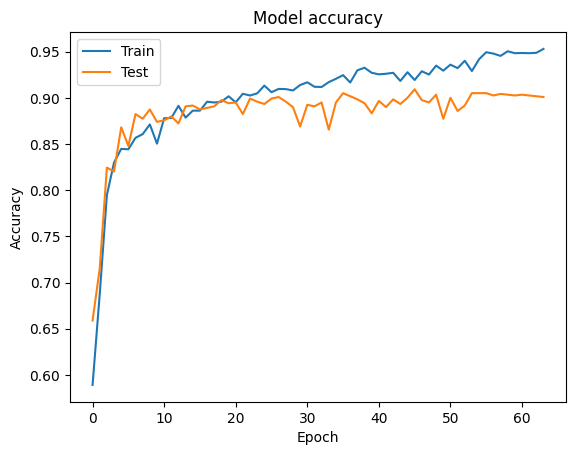

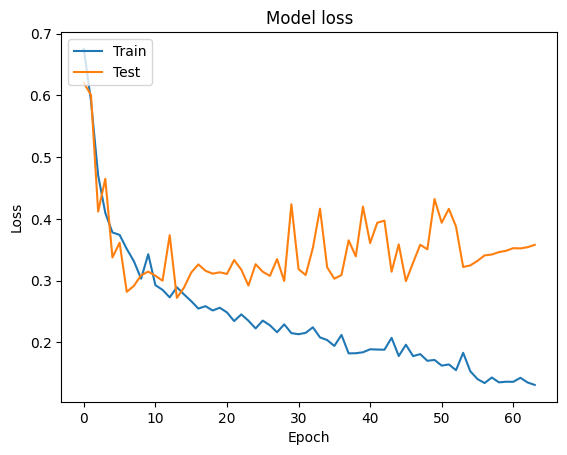

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
model.load_weights('weight_step2.weights.h5')
test_loss, test_accuracy = model.evaluate(
    X_test,
    y_test,
    verbose=1
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8851 - loss: 0.2798
Test Loss: 0.2883515954017639
Test Accuracy: 0.8829858899116516


In [42]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

label_names = ['SN I', 'SN II']

print(classification_report(y_true, y_pred_classes, target_names=label_names))

40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

W0000 00:00:1717630234.568306     149 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
              precision    recall  f1-score   support

        SN I       0.86      0.92      0.88       731
       SN II       0.91      0.85      0.88       756

    accuracy                           0.88      1487
   macro avg       0.88      0.88      0.88      1487
weighted avg       0.88      0.88      0.88      1487



47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


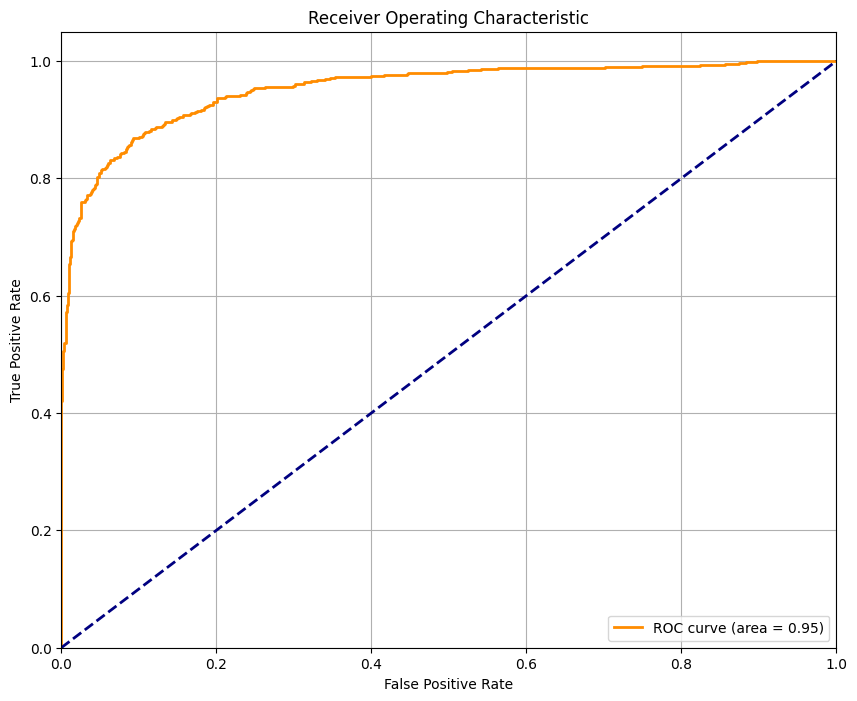

In [46]:
plot_roc_curve(y_test[:, 1], model.predict(X_test)[:, 1], pos_label=1)

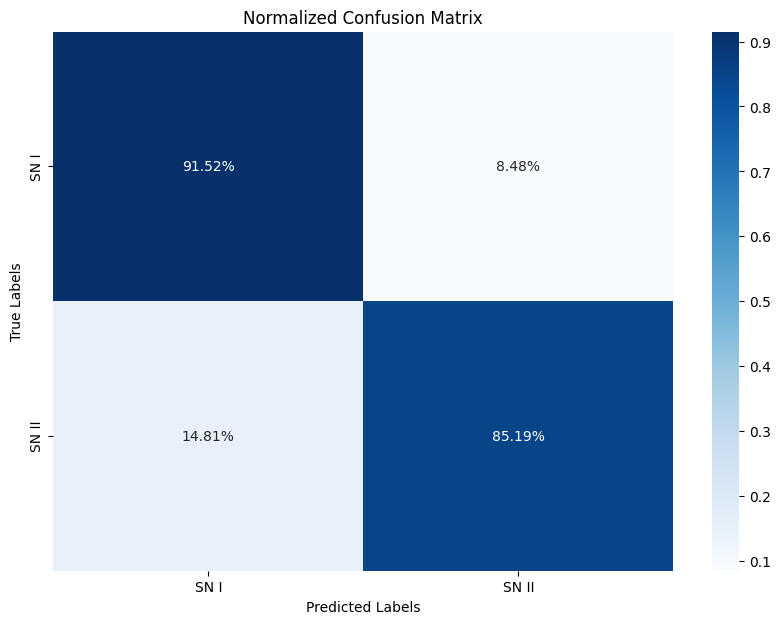

In [47]:
plot_confusion_matrix(y_true, y_pred_classes, label_names)

# Step 3a

In [50]:
cand = pd.read_csv('/kaggle/input/bts-bot-metadata-images/train_cand_ZTFSS.csv')
triplets = np.load('/kaggle/input/bts-bot-metadata-images/train_triplets_ZTFSS.npy', mmap_mode='r')

print('Shape of cand:', cand.shape)
print('Shape of images:', triplets.shape)

step3a_df = step3a_df[step3a_df['type'] != 'Other']

cand = cand.merge(step3a_df[['obj_id', 'type']].drop_duplicates(), left_on='objectId', right_on='obj_id', how='left')
cand.drop(columns=['obj_id'], inplace=True)

valid_indices = cand[cand['type'].isna() == False].index
cand = cand.loc[valid_indices]
count_types = cand.groupby('type')['objectId'].nunique()
print(count_types)

cand.sort_values(by='objectId', inplace=True)
images = np.array([triplets[idx] for idx in cand.index])
cand.reset_index(drop=True, inplace=True)

print("Shape of cand:", cand.shape)
print("Shape of images:", images.shape)

photo_df = step3a_df[step3a_df['prefix'].isin(cand['objectId'].unique())]
photo_df = photo_df.sort_values(by='obj_id')
photo_df.reset_index(drop=True, inplace=True)
count_obj_by_type(photo_df)

cand, images = augment_data(photo_df, cand, images)

print('Shape of Photometry:', photo_df.shape)
print('Shape of Metadata:', cand.shape)
print('Shape of Images:', images.shape)
count_obj_by_type(photo_df)

sorted_obj_id = photo_df['obj_id'].unique()
sorted_objectId = np.array(cand['objectId'])

are_equal = np.array_equal(sorted_obj_id, sorted_objectId)
print(are_equal)

scale_columns_photo = ['flux_ztfg', 'flux_ztfr', 'flux_ztfi', 'flux_error_ztfg', 'flux_error_ztfr', 'flux_error_ztfi']
photo_df = robust_scale(photo_df, scale_columns_photo)

scale_columns_metadata = [
    "sgscore1", "sgscore2", 
    "distpsnr1", "distpsnr2", 
    "fwhm", 
    "magpsf", 
    "sigmapsf", 
    "ra", 
    "dec", 
    "diffmaglim", 
    "ndethist", 
    "nmtchps", 
    "drb", 
    "ncovhist", 
    "sharpnr", 
    "scorr", 
    "sky"
    ]
cand = robust_scale(cand, scale_columns_metadata)
categorical_cols = ['type']

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(cand[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
cand = cand.drop(columns=categorical_cols).join(encoded_df)
cand.head()

Shape of cand: (10359, 82)
Shape of images: (10359, 63, 63, 3)
type
SN Ia      3435
SN Ib/c     224
Name: objectId, dtype: int64
Shape of cand: (3659, 83)
Shape of images: (3659, 63, 63, 3)
type
SN Ia      3435
SN Ib/c    1001
Name: obj_id, dtype: int64
Processing 777 augmented entries.


100%|██████████| 777/777 [03:23<00:00,  3.82it/s]


Shape of Photometry: (595700, 10)
Shape of Metadata: (4436, 83)
Shape of Images: (4436, 63, 63, 3)
Shape of Photometry: (595700, 10)
Shape of Metadata: (4436, 83)
Shape of Images: (4436, 63, 63, 3)
type
SN Ia      3435
SN Ib/c    1001
Name: obj_id, dtype: int64
True


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,objectId,jd,label,fid,diffmaglim,candid,isdiffpos,field,ra,dec,...,sigmagnr,source_set,N,split,is_SN,near_threshold,is_rise,programid,type_SN Ia,type_SN Ib/c
0,ZTF17aacldgo,2.459896e+06,0.0,2.0,-0.520099,2.141299e+18,True,403.0,-0.994559,-0.654396,...,0.046,dims,1.0,train,True,False,True,1.0,1.0,0.0
1,ZTF18aaceepu,2.459850e+06,1.0,2.0,0.025149,2.095507e+18,True,667.0,-0.305505,0.342401,...,0.056,trues,1.0,train,True,False,True,1.0,1.0,0.0
2,ZTF18aadlaxo,2.459263e+06,1.0,2.0,-0.392681,1.508224e+18,True,748.0,-0.487706,0.749323,...,0.053,trues,1.0,train,True,False,True,1.0,1.0,0.0
3,ZTF18aadzfso,2.458879e+06,1.0,2.0,-0.554685,1.124183e+18,True,706.0,-0.583307,0.558043,...,0.055,trues,1.0,train,True,True,True,1.0,1.0,0.0
4,ZTF18aaemivw,2.458430e+06,1.0,1.0,0.751259,6.754858e+17,True,712.0,-0.226465,0.461827,...,0.048,MS,1.0,train,True,False,False,1.0,1.0,0.0


In [51]:
config = {
    'image_size': (63,63,3),
    'metadata_size': (14,),
    'dropout_1': 0.4,
    'dropout_2': 0.4,
    'dropout_3': 0.5,
}

metadata_cols = [
  "objectId",
    "sgscore1", "sgscore2", 
    "distpsnr1", "distpsnr2", 
    "fwhm", 
    "magpsf", 
    "sigmapsf", 
    "ra", 
    "dec", 
    "diffmaglim", 
    "ndethist", 
    "nmtchps", 
    "drb", 
    "ncovhist", 
    "sharpnr", 
    "scorr", 
    "sky",
  "type_SN Ia",
  "type_SN Ib/c"
]

cand = cand[metadata_cols]

Train Photometry Shape: (3548, 100, 4)
Test Photometry Shape: (888, 100, 4)
Train Metadata Shape: (3548, 17)
Test Metadata Shape: (888, 17)
Train Images Shape: (3548, 63, 63, 3)
Test Images Shape: (888, 63, 63, 3)


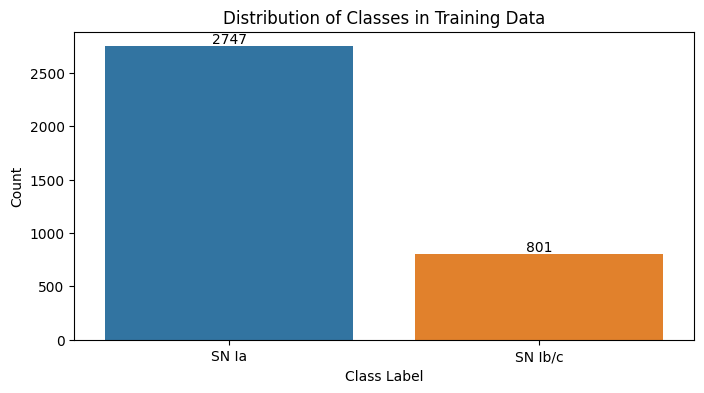

Model: "t2_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ multimodal_model_2              │ (None, 1)              │       226,805 │
│ (MultimodalModel)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_embedding_2                │ (None, 100, 64)        │           832 │
│ (ConvEmbedding)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_encoding_2           │ (None, 100, 64)        │             0 │
│ (PositionalEncoding)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ (None, 100, 64)        │        33,472 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_5 (Concatenate)     │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,241 (1020.47 KB)

 Trainable params: 261,207 (1020.34 KB)

 Non-trainable params: 34 (136.00 B)

In [58]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Photométrie
# Aggregating photometry data into sequences

photo_df = photo_df.groupby('obj_id').head(100)

grouped = photo_df.groupby('obj_id')
sequences = [group[['mjd', 'flux_ztfg', 'flux_ztfi', 'flux_ztfr']].values for _, group in grouped]
X_photometry = np.array(sequences)

# Métadonnées
metadata_features = cand.drop(columns=['objectId', 'type_SN Ia', 'type_SN Ib/c'])
X_metadata = metadata_features.values

# Labels (One-Hot Encoded Types)
labels = cand[['type_SN Ia', 'type_SN Ib/c']].values

indices = range(len(X_metadata))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

# Appliquez ces indices pour diviser toutes les données
X_train_photometry = X_photometry[train_idx]
X_test_photometry = X_photometry[test_idx]

X_train_metadata = X_metadata[train_idx]
X_test_metadata = X_metadata[test_idx]

X_train_images = images[train_idx]
X_test_images = images[test_idx]

y_train = labels[train_idx]
y_test = labels[test_idx]

X_train = [X_train_photometry, X_train_metadata, X_train_images]
X_test = [X_test_photometry, X_test_metadata, X_test_images]

# print shape
print("Train Photometry Shape:", X_train[0].shape)
print("Test Photometry Shape:", X_test[0].shape)

print("Train Metadata Shape:", X_train[1].shape)
print("Test Metadata Shape:", X_test[1].shape)

print("Train Images Shape:", X_train[2].shape)
print("Test Images Shape:", X_test[2].shape)

plot_distribution(y_train, labels=['SN Ia', 'SN Ib/c'])

num_filters = 64
num_classes = y_train.shape[1]
num_layers = 1
d_model = 64
num_heads = 16
dff = 128
rate = 0.5

X_train_shapes = [X_train[0].shape[1:], X_train[1].shape[1:], X_train[2].shape[1:]]

# Initialize the T2Model with the proper configuration
model = T2Model(num_filters=num_filters, num_classes=num_classes, num_layers=num_layers,
                d_model=d_model, num_heads=num_heads, dff=dff, input_shapes=X_train_shapes, 
                rate=rate)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Creating the final model instance
model.build(input_shapes=X_train_shapes)

# Print the model summary
model.summary()

In [53]:
from sklearn.utils.class_weight import compute_class_weight

y_train_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_integers), y=y_train_integers)
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}

class_weight_dict

{0: 0.6457954131780124, 1: 2.2147315855181025}

In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_path = 'weight_step3a.weights.h5'
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# Callback to stop training when a monitored metric has stopped improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=50,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Callback to reduce the learning rate when a metric has stopped improving
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.01,  # Factor by which the learning rate will be reduced
    patience=40,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1
)

callbacks = [early_stopping_callback, reduce_lr_callback, checkpoint_callback]

In [59]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weight_dict
)

Epoch 1/200
11/89 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4490 - loss: 0.8914

W0000 00:00:1717634122.288752     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717634122.290986     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.5845 - loss: 0.7251

W0000 00:00:1717634141.100692     149 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717634142.443079     147 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss did not improve from 0.35243
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 239ms/step - accuracy: 0.5854 - loss: 0.7243 - val_accuracy: 0.7915 - val_loss: 0.4977 - learning_rate: 0.0010
Epoch 2/200
87/89 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7658 - loss: 0.5785
Epoch 2: val_loss did not improve from 0.35243
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7653 - loss: 0.5788 - val_accuracy: 0.7634 - val_loss: 0.5665 - learning_rate: 0.0010
Epoch 3/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7514 - loss: 0.5488
Epoch 3: val_loss did not improve from 0.35243
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7515 - loss: 0.5489 - val_accuracy: 0.8070 - val_loss: 0.4422 - learning_rate: 0.0010
Epoch 4/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7846 - loss: 0.5119
Epoch 4: val_loss did not improve from 0.35243
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7846 - loss: 0.5118 - val_accuracy: 0.6465 - val_loss: 0.6801 - learning_rate

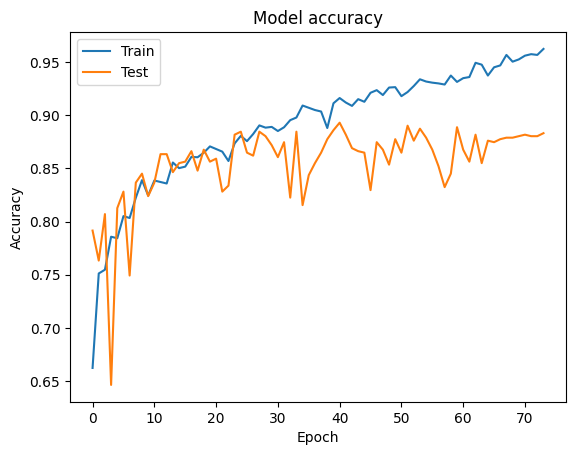

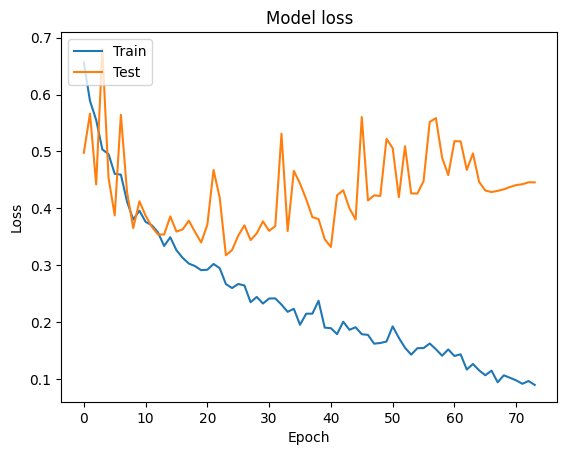

In [60]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [61]:
model.load_weights('weight_step3a.weights.h5')
test_loss, test_accuracy = model.evaluate(
    X_test,
    y_test,
    verbose=1
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8542 - loss: 0.3591
Test Loss: 0.3581356406211853
Test Accuracy: 0.8581081032752991


In [62]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

label_names = ['SN Ia', 'SN Ib/c']

print(classification_report(y_true, y_pred_classes, target_names=label_names))

14/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

W0000 00:00:1717634277.547845     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step
              precision    recall  f1-score   support

       SN Ia       0.95      0.86      0.90       688
     SN Ib/c       0.64      0.84      0.73       200

    accuracy                           0.86       888
   macro avg       0.80      0.85      0.82       888
weighted avg       0.88      0.86      0.86       888



28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


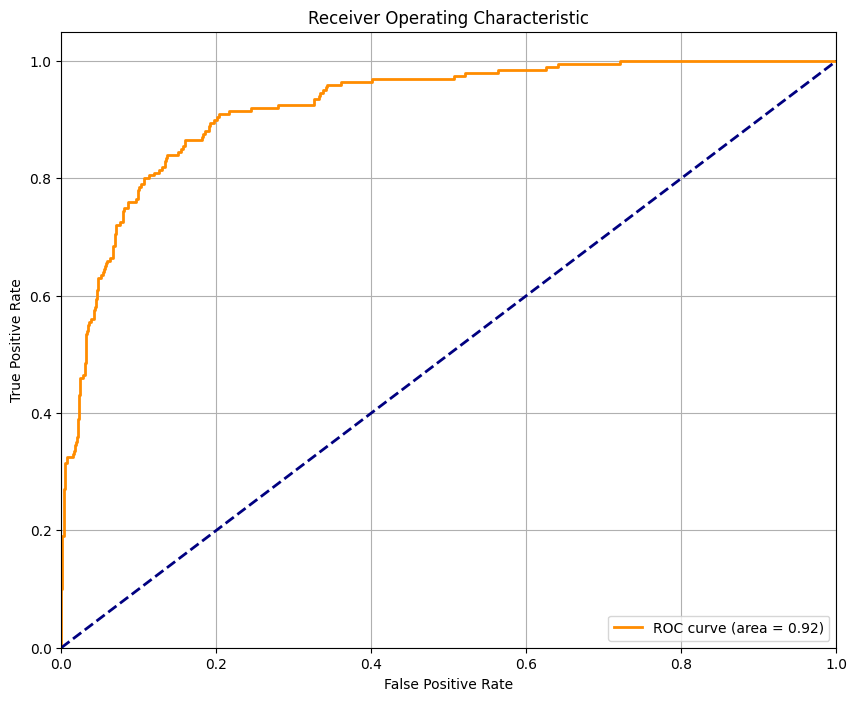

In [63]:
plot_roc_curve(y_test[:, 1], model.predict(X_test)[:, 1], pos_label=1)

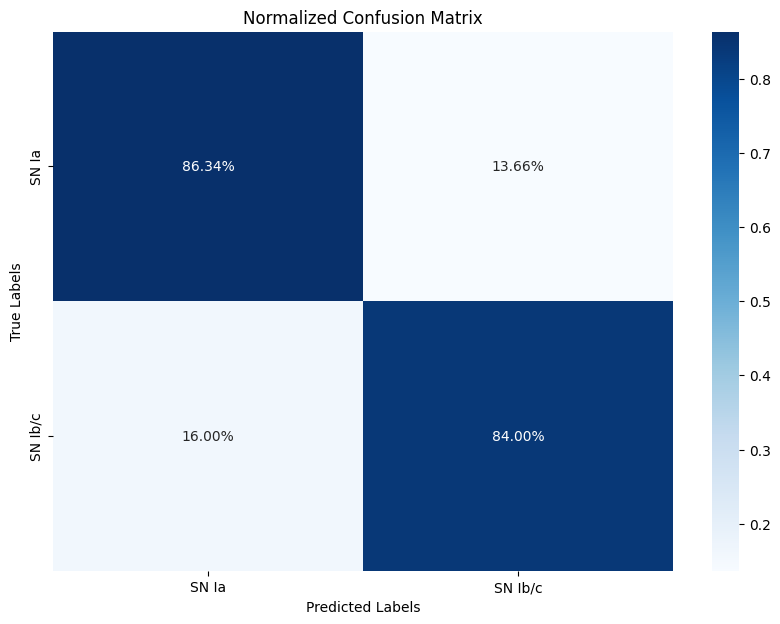

In [64]:
plot_confusion_matrix(y_true, y_pred_classes, label_names)

# Step 3b

In [ ]:
cand = pd.read_csv('/kaggle/input/bts-bot-metadata-images/train_cand_ZTFSS.csv')
triplets = np.load('/kaggle/input/bts-bot-metadata-images/train_triplets_ZTFSS.npy', mmap_mode='r')

print('Shape of cand:', cand.shape)
print('Shape of images:', triplets.shape)

step3b_df = step3b_df[step3b_df['type'] != 'Other']

cand = cand.merge(step3b_df[['obj_id', 'type']].drop_duplicates(), left_on='objectId', right_on='obj_id', how='left')
cand.drop(columns=['obj_id'], inplace=True)

valid_indices = cand[cand['type'].isna() == False].index
cand = cand.loc[valid_indices]
count_types = cand.groupby('type')['objectId'].nunique()
print(count_types)

cand.sort_values(by='objectId', inplace=True)
images = np.array([triplets[idx] for idx in cand.index])
cand.reset_index(drop=True, inplace=True)

print("Shape of cand:", cand.shape)
print("Shape of images:", images.shape)

photo_df = step3b_df[step3b_df['prefix'].isin(cand['objectId'].unique())]
photo_df = photo_df.sort_values(by='obj_id')
photo_df.reset_index(drop=True, inplace=True)
count_obj_by_type(photo_df)

cand, images = augment_data(photo_df, cand, images)

print('Shape of Photometry:', photo_df.shape)
print('Shape of Metadata:', cand.shape)
print('Shape of Images:', images.shape)
count_obj_by_type(photo_df)

sorted_obj_id = photo_df['obj_id'].unique()
sorted_objectId = np.array(cand['objectId'])

are_equal = np.array_equal(sorted_obj_id, sorted_objectId)
print(are_equal)

scale_columns_photo = ['flux_ztfg', 'flux_ztfr', 'flux_ztfi', 'flux_error_ztfg', 'flux_error_ztfr', 'flux_error_ztfi']
photo_df = robust_scale(photo_df, scale_columns_photo)

scale_columns_metadata = [
    "sgscore1",
    "distpsnr1",
    "sgscore2",
    "distpsnr2",
    "fwhm",
    "magpsf",
    "sigmapsf",
    "ra",
    "dec",
    "diffmaglim",
    "ndethist",
    "nmtchps",
    "age",
    "peakmag_so_far"
    ]
cand = robust_scale(cand, scale_columns_metadata)
categorical_cols = ['type']

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(cand[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
cand = cand.drop(columns=categorical_cols).join(encoded_df)
cand.head()

In [ ]:
config = {
    'image_size': (63,63,3),
    'metadata_size': (14,),
    'dropout_1': 0.4,
    'dropout_2': 0.4,
    'dropout_3': 0.5,
}

metadata_cols = [
  "objectId",
  "sgscore1",
  "distpsnr1",
  "sgscore2",
  "distpsnr2",
  "fwhm",
  "magpsf",
  "sigmapsf",
  "ra",
  "dec",
  "diffmaglim",
  "ndethist",
  "nmtchps",
  "age",
  "peakmag_so_far",
  "type_SN II",
  "type_SN IIn/b"
]

cand = cand[metadata_cols]

In [65]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Photométrie
# Aggregating photometry data into sequences

grouped = photo_df.groupby('obj_id')
sequences = [group[['mjd', 'flux_ztfg', 'flux_ztfi', 'flux_ztfr']].values for _, group in grouped]
X_photometry = np.array(sequences)

# Métadonnées
metadata_features = cand.drop(columns=['objectId', 'type_SN II', 'type_SN IIn/b'])
X_metadata = metadata_features.values

# Labels (One-Hot Encoded Types)
labels = cand[['type_SN II', 'type_SN IIn/b']].values

indices = range(len(X_metadata))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

# Appliquez ces indices pour diviser toutes les données
X_train_photometry = X_photometry[train_idx]
X_test_photometry = X_photometry[test_idx]

X_train_metadata = X_metadata[train_idx]
X_test_metadata = X_metadata[test_idx]

X_train_images = images[train_idx]
X_test_images = images[test_idx]

y_train = labels[train_idx]
y_test = labels[test_idx]

X_train = [X_train_photometry, X_train_metadata, X_train_images]
X_test = [X_test_photometry, X_test_metadata, X_test_images]

# print shape
print("Train Photometry Shape:", X_train[0].shape)
print("Test Photometry Shape:", X_test[0].shape)

print("Train Metadata Shape:", X_train[1].shape)
print("Test Metadata Shape:", X_test[1].shape)

print("Train Images Shape:", X_train[2].shape)
print("Test Images Shape:", X_test[2].shape)

plot_distribution(y_train, labels=['SN II', 'SN IIn/b'])

num_filters = 64
num_classes = y_train.shape[1]
num_layers = 1
d_model = 64
num_heads = 16
dff = 128
rate = 0.5

X_train_shapes = [X_train[0].shape[1:], X_train[1].shape[1:], X_train[2].shape[1:]]

# Initialize the T2Model with the proper configuration
model = T2Model(num_filters=num_filters, num_classes=num_classes, num_layers=num_layers,
                d_model=d_model, num_heads=num_heads, dff=dff, input_shapes=X_train_shapes, 
                rate=rate)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Creating the final model instance
model.build(input_shapes=X_train_shapes)

# Print the model summary
model.summary()

KeyError: "['type_SN II', 'type_SN IIn/b'] not found in axis"

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_train_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_integers), y=y_train_integers)
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}

class_weight_dict

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_path = 'weight_step3b.weights.h5'
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# Callback to stop training when a monitored metric has stopped improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Callback to reduce the learning rate when a metric has stopped improving
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Factor by which the learning rate will be reduced
    patience=5,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1
)

callbacks = [early_stopping_callback, reduce_lr_callback, checkpoint_callback]

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weight_dict
)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('weight_step3b.weights.h5')
test_loss, test_accuracy = model.evaluate(
    X_test,
    y_test,
    verbose=1
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

label_names = ['SN II', 'SN IIn/b']

print(classification_report(y_true, y_pred_classes, target_names=label_names))

In [ ]:
plot_roc_curve(y_test[:, 1], model.predict(X_test)[:, 1], pos_label=1)
plot_confusion_matrix(y_true, y_pred_classes, label_names)

# Step 3a multi

In [ ]:
cand = pd.read_csv('data/train_cand_ZTFSS.csv')
triplets = np.load('data/train_triplets_ZTFSS.npy', mmap_mode='r')

print('Shape of cand:', cand.shape)
print('Shape of images:', triplets.shape)

cand = cand.merge(step3a_df[['obj_id', 'type']].drop_duplicates(), left_on='objectId', right_on='obj_id', how='left')
cand.drop(columns=['obj_id'], inplace=True)

valid_indices = cand[cand['type'].isna() == False].index
cand = cand.loc[valid_indices]
count_types = cand.groupby('type')['objectId'].nunique()
print(count_types)

cand.sort_values(by='objectId', inplace=True)
images = np.array([triplets[idx] for idx in cand.index])
cand.reset_index(drop=True, inplace=True)

print("Shape of cand:", cand.shape)
print("Shape of images:", images.shape)

photo_df = step3a_df[step3a_df['prefix'].isin(cand['objectId'].unique())]
photo_df = photo_df.sort_values(by='obj_id')
photo_df.reset_index(drop=True, inplace=True)
count_obj_by_type(photo_df)

cand, images = augment_data(photo_df, cand, images)

print('Shape of Photometry:', photo_df.shape)
print('Shape of Metadata:', cand.shape)
print('Shape of Images:', images.shape)
count_obj_by_type(photo_df)

sorted_obj_id = photo_df['obj_id'].unique()
sorted_objectId = np.array(cand['objectId'])

are_equal = np.array_equal(sorted_obj_id, sorted_objectId)
print(are_equal)

scale_columns_photo = ['flux_ztfg', 'flux_ztfr', 'flux_ztfi', 'flux_error_ztfg', 'flux_error_ztfr', 'flux_error_ztfi']
photo_df = robust_scale(photo_df, scale_columns_photo)

scale_columns_metadata = [
    "sgscore1",
    "distpsnr1",
    "sgscore2",
    "distpsnr2",
    "fwhm",
    "magpsf",
    "sigmapsf",
    "ra",
    "dec",
    "diffmaglim",
    "ndethist",
    "nmtchps",
    "age",
    "peakmag_so_far"
    ]
cand = robust_scale(cand, scale_columns_metadata)
categorical_cols = ['type']

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(cand[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
cand = cand.drop(columns=categorical_cols).join(encoded_df)
cand.head()

In [ ]:
config = {
    'image_size': (63,63,3),
    'metadata_size': (14,),
    'dropout_1': 0.4,
    'dropout_2': 0.4,
    'dropout_3': 0.5,
}

metadata_cols = [
  "objectId",
  "sgscore1",
  "distpsnr1",
  "sgscore2",
  "distpsnr2",
  "fwhm",
  "magpsf",
  "sigmapsf",
  "ra",
  "dec",
  "diffmaglim",
  "ndethist",
  "nmtchps",
  "age",
  "peakmag_so_far",
  "type_Other",
  "type_SN Ia",
  "type_SN Ib/c"
]

cand = cand[metadata_cols]

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Photométrie
# Aggregating photometry data into sequences

grouped = photo_df.groupby('obj_id')
sequences = [group[['mjd', 'flux_ztfg', 'flux_ztfi', 'flux_ztfr']].values for _, group in grouped]
X_photometry = np.array(sequences)

# Métadonnées
metadata_features = cand.drop(columns=['objectId', 'type_Other', 'type_SN Ia', 'type_SN Ib/c'])
X_metadata = metadata_features.values

# Labels (One-Hot Encoded Types)
labels = cand[['type_Other', 'type_SN Ia', 'type_SN Ib/c']].values

indices = range(len(X_metadata))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

# Appliquez ces indices pour diviser toutes les données
X_train_photometry = X_photometry[train_idx]
X_test_photometry = X_photometry[test_idx]

X_train_metadata = X_metadata[train_idx]
X_test_metadata = X_metadata[test_idx]

X_train_images = images[train_idx]
X_test_images = images[test_idx]

y_train = labels[train_idx]
y_test = labels[test_idx]

X_train = [X_train_photometry, X_train_metadata, X_train_images]
X_test = [X_test_photometry, X_test_metadata, X_test_images]

# print shape
print("Train Photometry Shape:", X_train[0].shape)
print("Test Photometry Shape:", X_test[0].shape)

print("Train Metadata Shape:", X_train[1].shape)
print("Test Metadata Shape:", X_test[1].shape)

print("Train Images Shape:", X_train[2].shape)
print("Test Images Shape:", X_test[2].shape)

plot_distribution(y_train, labels=['type_Other', 'SN Ia', 'SN Ib/c'])

num_filters = 32
num_classes = y_train.shape[1]
num_layers = 1
d_model = 32
num_heads = 16
dff = 128
rate = 0.5

X_train_shapes = [X_train[0].shape[1:], X_train[1].shape[1:], X_train[2].shape[1:]]

# Initialize the T2Model with the proper configuration
model = T2Model(num_filters=num_filters, num_classes=num_classes, num_layers=num_layers,
                d_model=d_model, num_heads=num_heads, dff=dff, input_shapes=X_train_shapes, 
                rate=rate, config=config)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Creating the final model instance
model.build(input_shapes=X_train_shapes)

# Print the model summary
model.summary()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_train_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_integers), y=y_train_integers)
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}

class_weight_dict

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_path = 'weight_step3a_multi.weights.h5'
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# Callback to stop training when a monitored metric has stopped improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Callback to reduce the learning rate when a metric has stopped improving
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Factor by which the learning rate will be reduced
    patience=5,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1
)

callbacks = [early_stopping_callback, reduce_lr_callback, checkpoint_callback]

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weight_dict
)